## EDA   

In [50]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [51]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Load the dataset
df = pd.read_csv(r"C:\Users\fumde\Downloads\Dune Sales Data.csv")

In [53]:
# Print the top rows
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [54]:
# print the bottom rows
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.shape

(34867, 12)

In [56]:
# Examine the columns/features of the data

In [57]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [58]:
# investigate the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [59]:
# Numerical statistical analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [60]:
# categorical statistical analysis
df.describe(include = ['object','bool'])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [61]:
# dealing with missing data

In [62]:
# investigate the missing data
null_vals = df.isnull().sum
null_vals()


Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

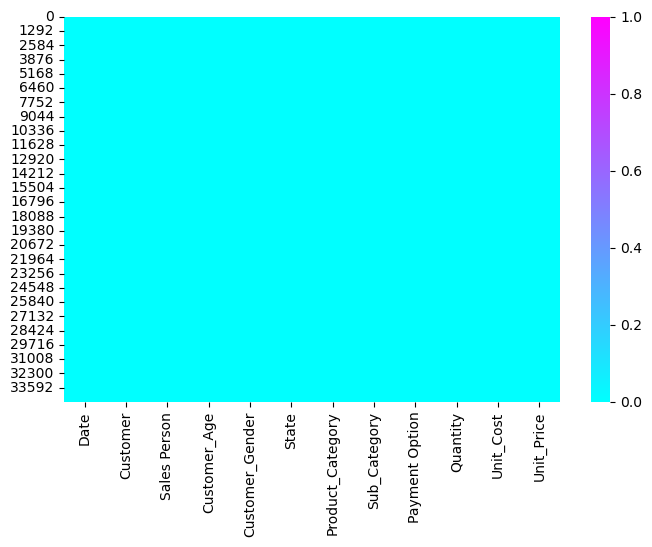

In [63]:
# visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap='cool');

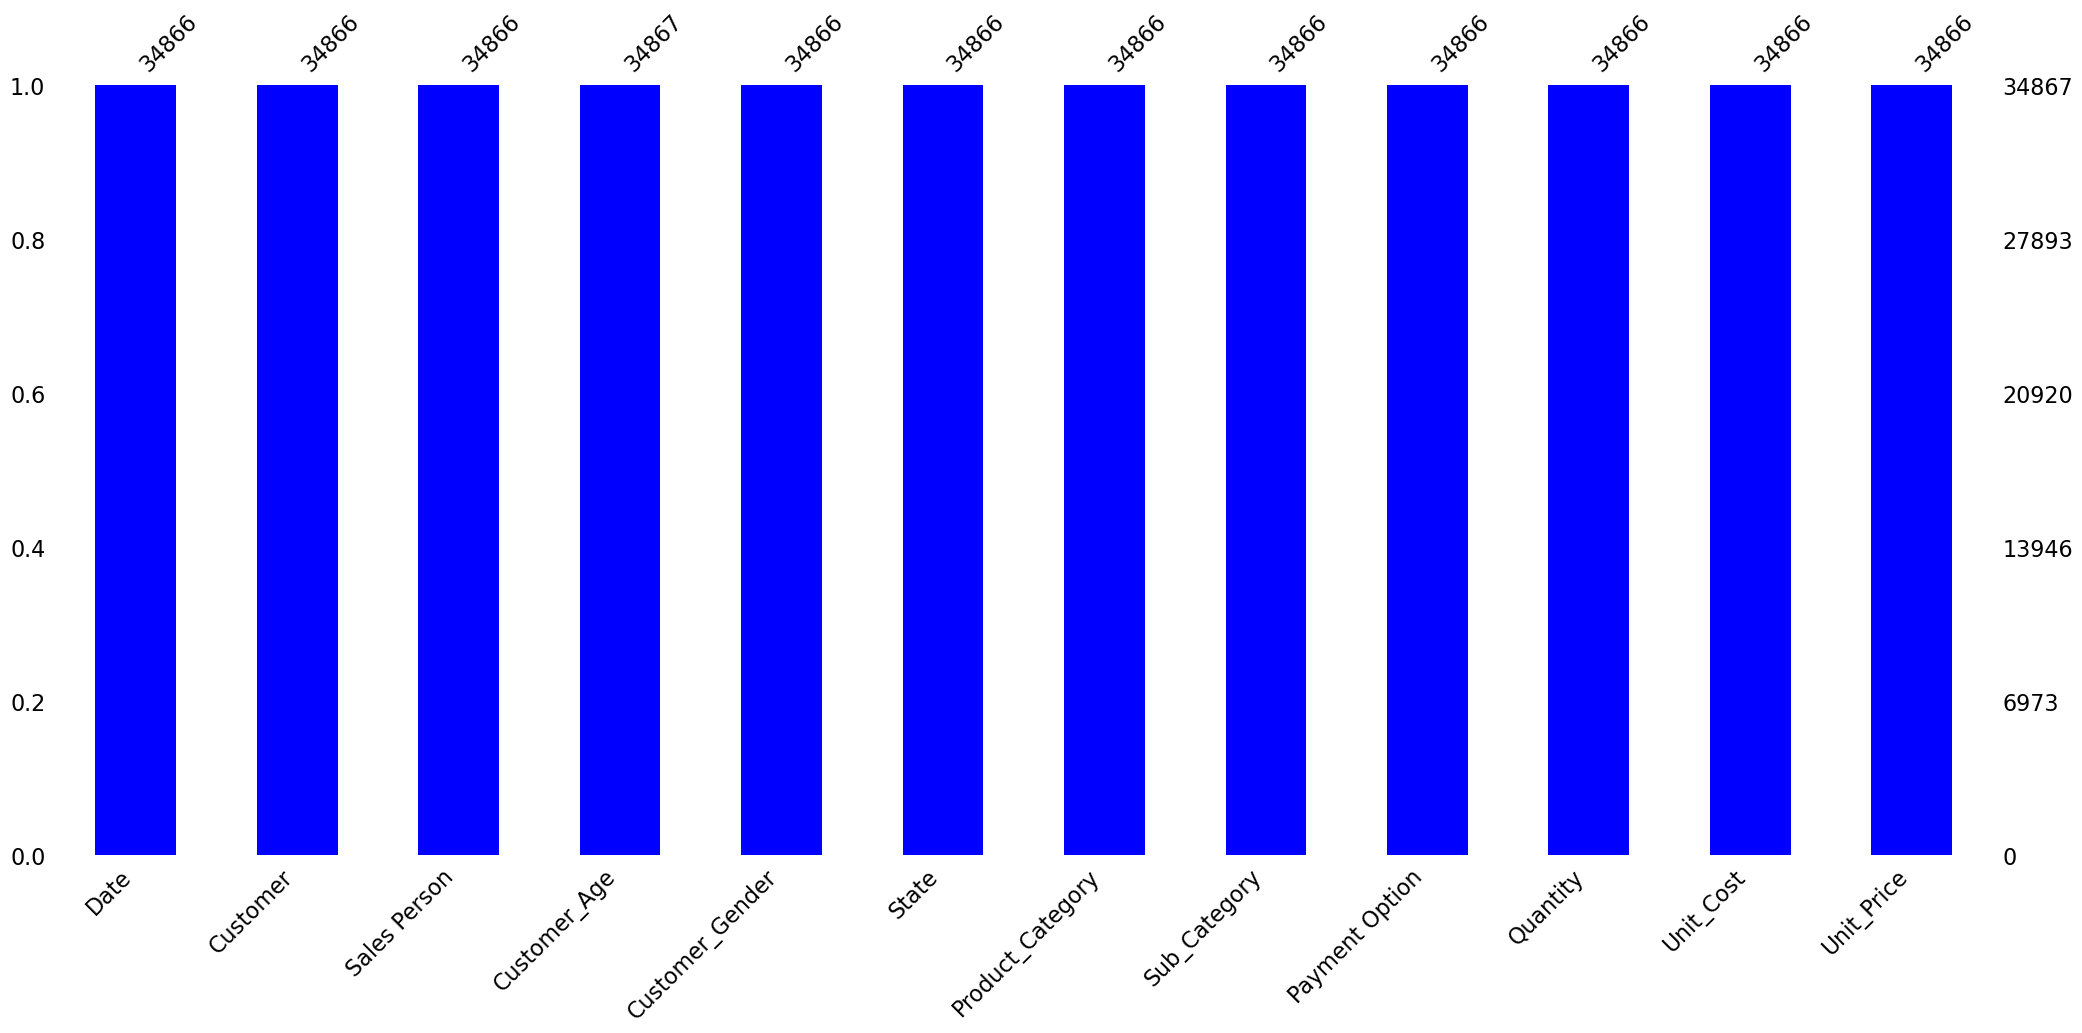

In [64]:
msno.bar(df, color='blue');

In [65]:
# display where the missing data is 
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Drop the missing data
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [68]:
## Datatime analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [69]:
# convert the date column into a pandas datetime object
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [70]:
# Extract the year, month,quater
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month_name'] = df['Date'].dt.month_name()
df['quater'] = df['Date'].dt.quarter

df.head(2)



,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quater
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [71]:
# Group Customer
def age_group(x):
    if x <= 25:
        return'<=25 Young Adult'
    elif x <=40:
        return'26-40 Adult'
    elif x <=50:
        return'41-50 Old Adult'
    else:
        return '>=51 Elders'
# Apply function to the data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quater,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,26-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,26-40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,26-40 Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,26-40 Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,26-40 Adult


In [72]:
# Cost revenue and profit calculation
df["cost"]=df['Quantity']*df['Unit_Cost']
df["revenue"]=df['Quantity']*df['Unit_Price']
df["Profit"]=df['revenue']- df['cost']
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quater,age_group,cost,revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,26-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,26-40 Adult,49.0,57.0,8.0


In [73]:
# profit/loss grouping
def porl(x):
    if x >= 0:
        return 'Profit'
    else:
        return'Loss'
df['profit_label'] = df['Profit'].apply(porl)
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quater,age_group,cost,revenue,Profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,26-40 Adult,80.00,109.0,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,26-40 Adult,49.00,57.0,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.0,2016,2,February,1,26-40 Adult,11.01,15.0,3.99,Profit


## UNIVARIATE ANALYSIS

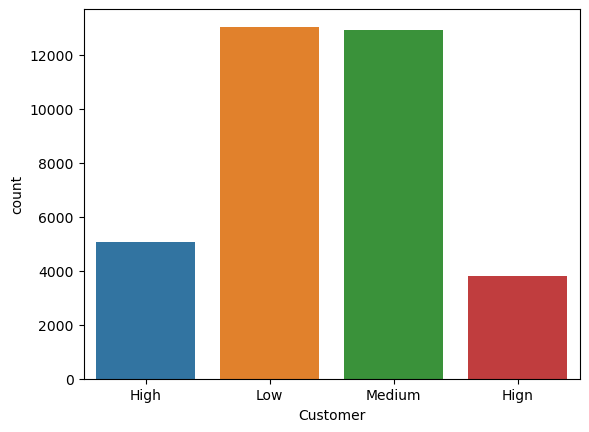

In [74]:
## Count of customers by spec
sns.countplot(x='Customer', data=df);

In [75]:
# Investigate columns affected
df[df['Customer']== 'Hign'].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quater,age_group,cost,revenue,Profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,26-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,26-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,26-40 Adult,50.01,56.01,6.0,Profit


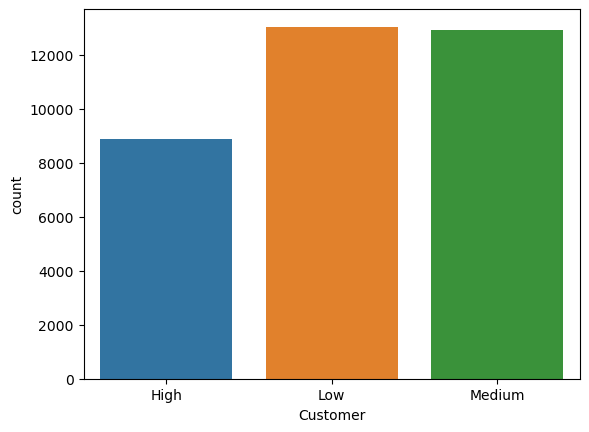

In [76]:
# Correct the Spelling
df.loc[df['Customer']=='Hign', 'Customer'] = 'High'

sns.countplot(x='Customer', data=df);

In [77]:
df['Customer'].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

## It can be deduced from the above that the the low customers make the highest transaction while the High customers have the lowest in terms of transaction count

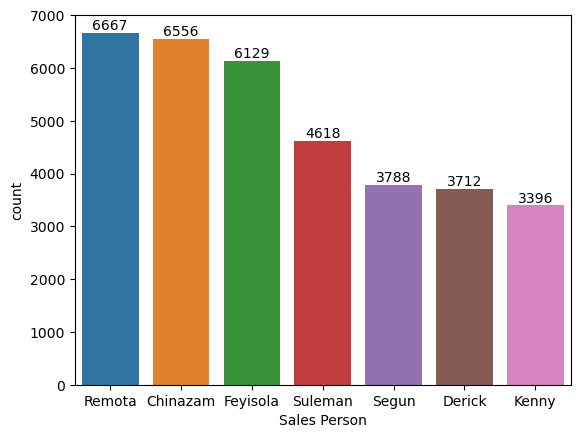

In [78]:
# Transaction count by sales person
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

The above shows that Remota made the highest transanction while Kenny made the lowest transaction.

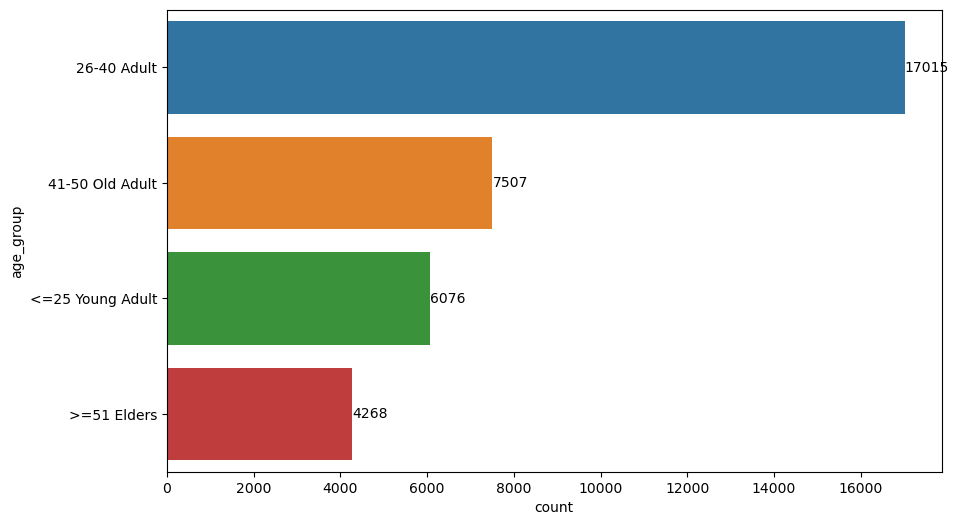

In [79]:
## Total Transaction by Customer Age Group
plt.figure(figsize=(10,6))

ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

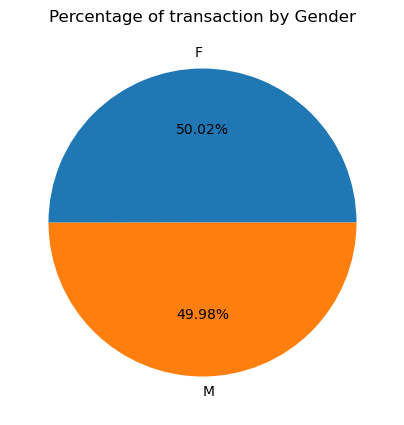

In [80]:
# Total transaction by Customer Gender


fig,ax = plt.subplots(figsize=(5,5))
count  = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transaction by Gender")
plt.show();



Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64


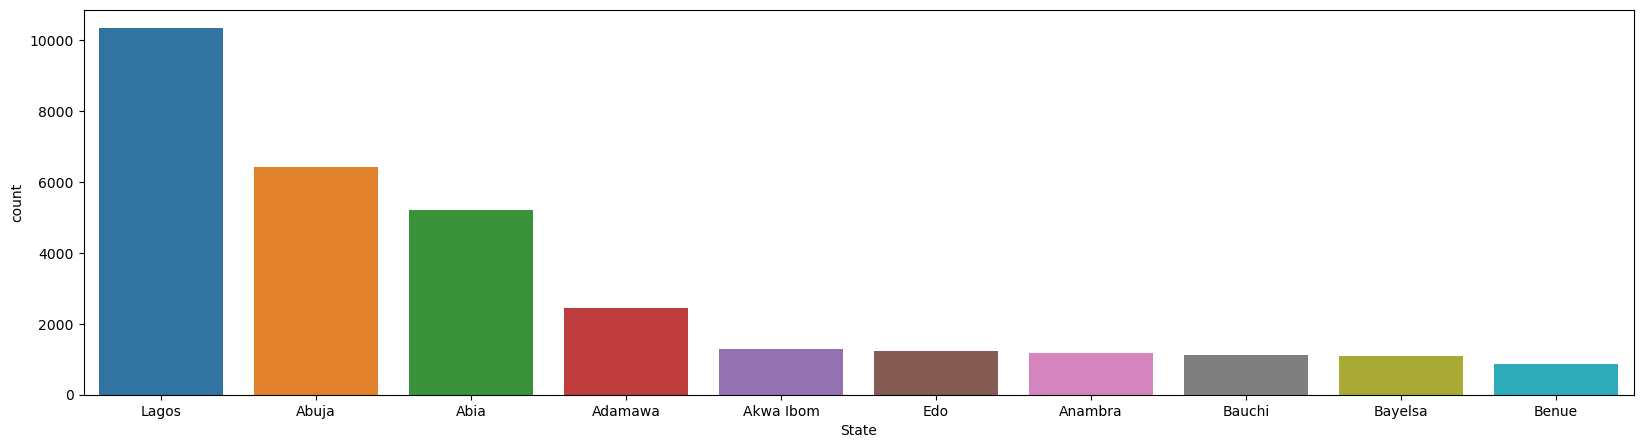

In [81]:
## Total Transaction by state

plt.figure(figsize=(20,5))
topten = df["State"].value_counts().head(10)
sns.countplot(x = "State", data=df, order = topten.index);
print(topten)

##The above shows the top ten state in terms of transaction counts, and it can be deduced that Lagos has the higest transaction count followed by abuja.


In [82]:
## Transaction by Product Category
df["Product_Category"].value_counts().head()

Accessories    22534
Phones          7093
Clothing        5239
Name: Product_Category, dtype: int64

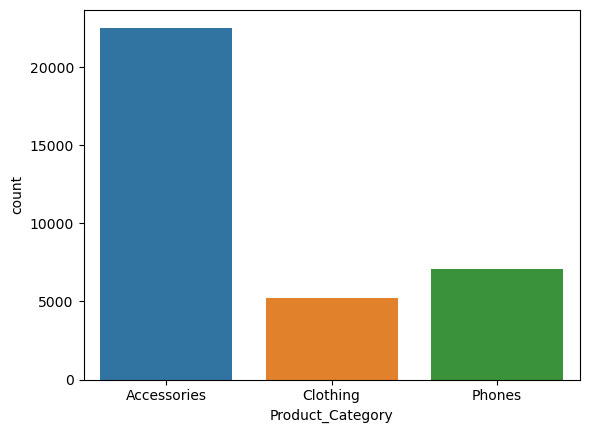

In [83]:
sns.countplot(x='Product_Category', data=df);

 The above shows that the most transaction comes from Accessories followed by phones then clothing.

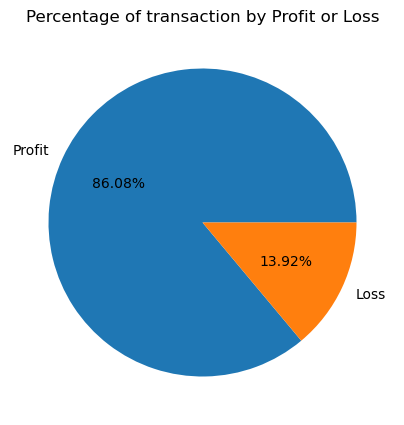

In [84]:
## Total Transaction by Profit or Loss


fig,ax = plt.subplots(figsize=(5,5))
count  = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transaction by Profit or Loss")
plt.show();


This shows that profit was made in most of the transactions 

NUMERICAL DATA VISUALIZATION

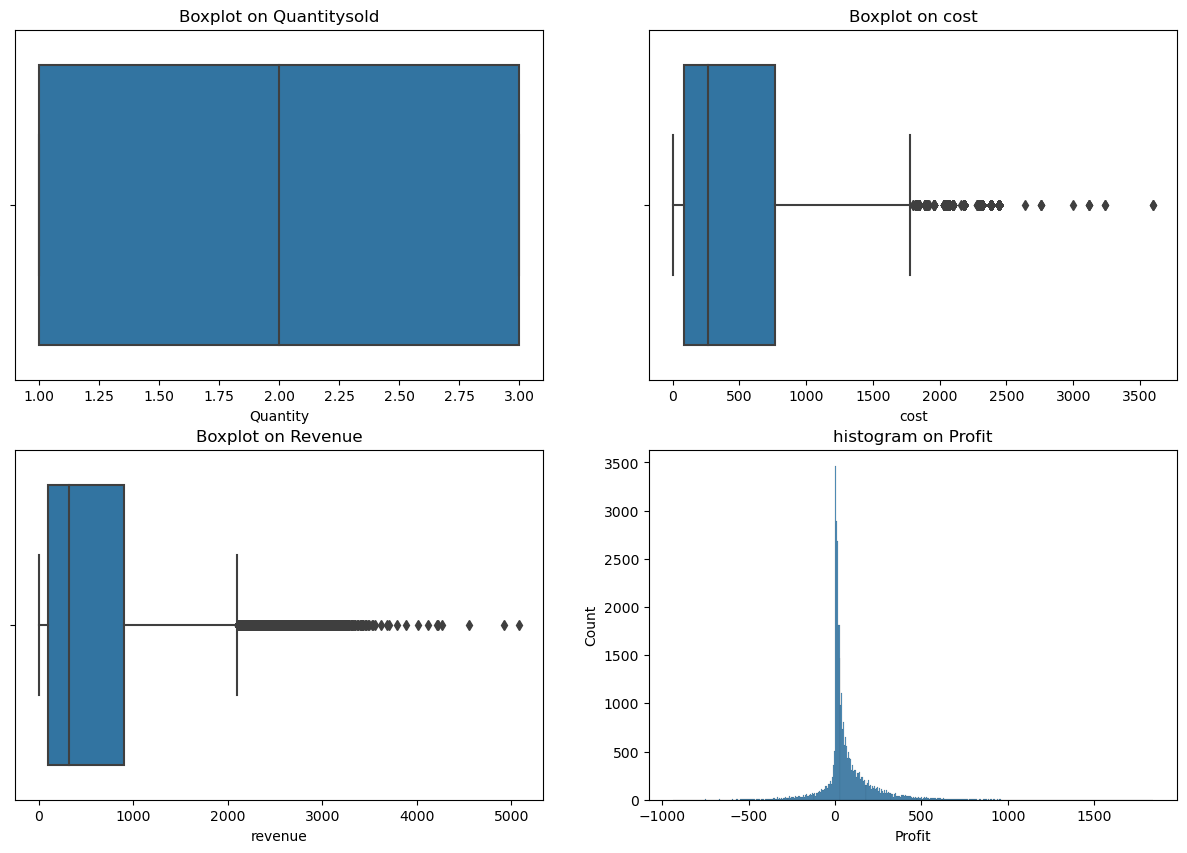

In [85]:
# Quantity,Cost,Revenue and Profit - subplot


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantitysold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Revenue")

sns.histplot(x="Profit", data=df, ax=axs[1,1])
axs[1,1].set_title("histogram on Profit");


## Bivariant Analysis
Bivariant analysis involves analyzing the relationship between two variables.
focus on profit

''

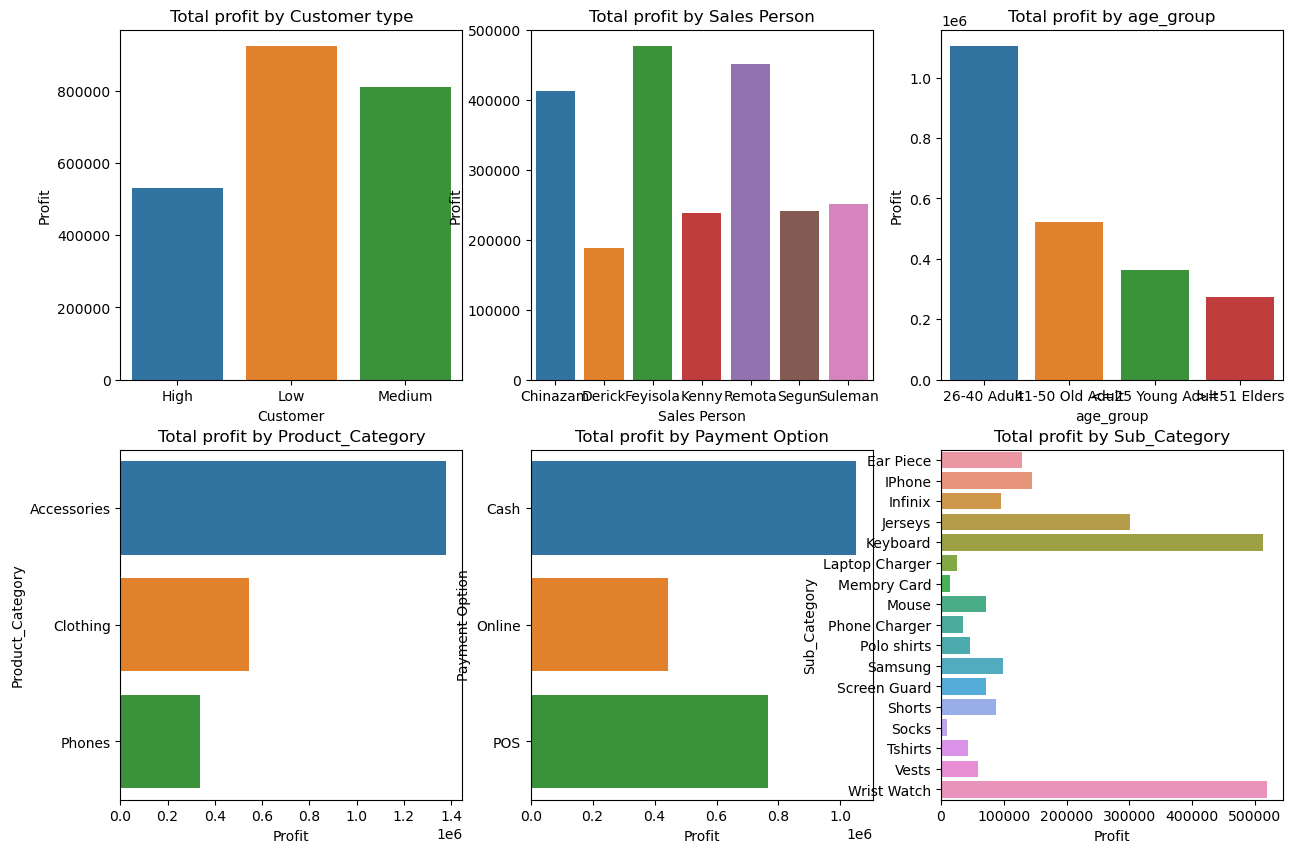

In [86]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

cust_prof = df.groupby("Customer")["Profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y='Profit', ax=axs[0,0])
axs[0,0].set_title("Total profit by Customer type")

sp_prof = df.groupby("Sales Person")["Profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y='Profit', ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person")

ag_prof = df.groupby("age_group")["Profit"].sum().reset_index()
sns.barplot(x="age_group", data=ag_prof, y='Profit', ax=axs[0,2])
axs[0,2].set_title("Total profit by age_group")

pc_prof = df.groupby("Product_Category")["Profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=pc_prof, x='Profit', ax=axs[1,0])
axs[1,0].set_title("Total profit by Product_Category")

po_prof = df.groupby("Payment Option")["Profit"].sum().reset_index()
sns.barplot(y="Payment Option", data=po_prof, x='Profit', ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option")

sc_prof = df.groupby("Sub_Category")["Profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=sc_prof, x='Profit', ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub_Category")
;


Text(0.5, 1.0, 'Customer_Age and Profit')

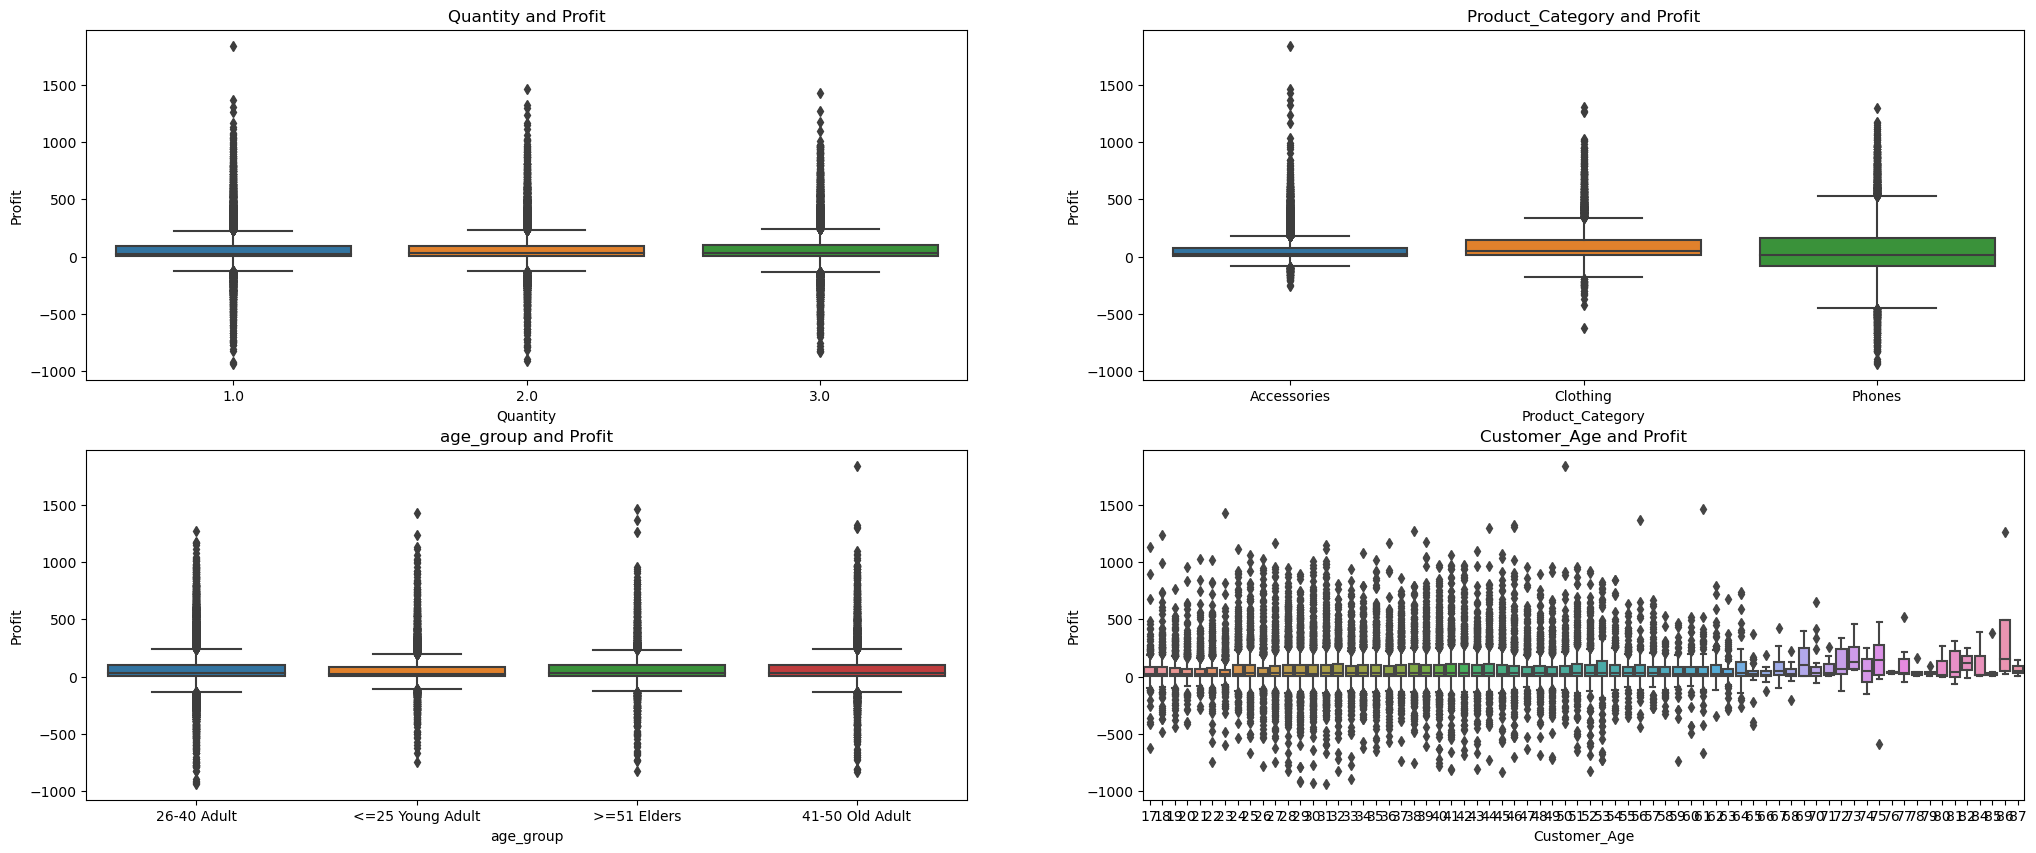

In [87]:
# Numerical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x="Quantity", y="Profit" , data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x="Product_Category", y="Profit" , data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit")

sns.boxplot(x="age_group", y="Profit" , data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.boxplot(x="Customer_Age", y="Profit" , data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit")



# Multivariate Analysis


''

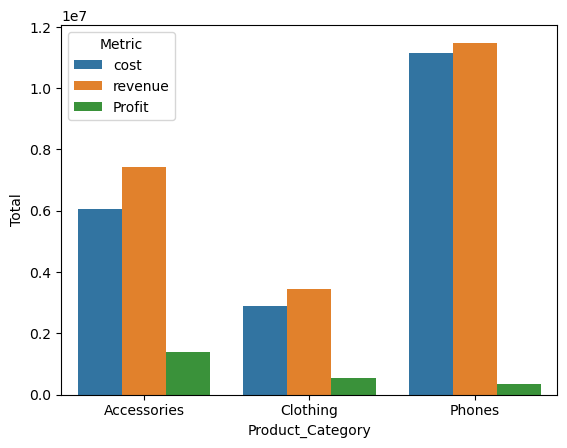

In [88]:
# Product Category against Cost, Revenue and profit
procat = df.groupby("Product_Category")[["cost","revenue","Profit"]].sum().reset_index()
procat = pd. melt(procat, id_vars="Product_Category",var_name="Metric", value_name="Total")
sns.barplot(data=procat, x='Product_Category', y="Total", hue="Metric")
;


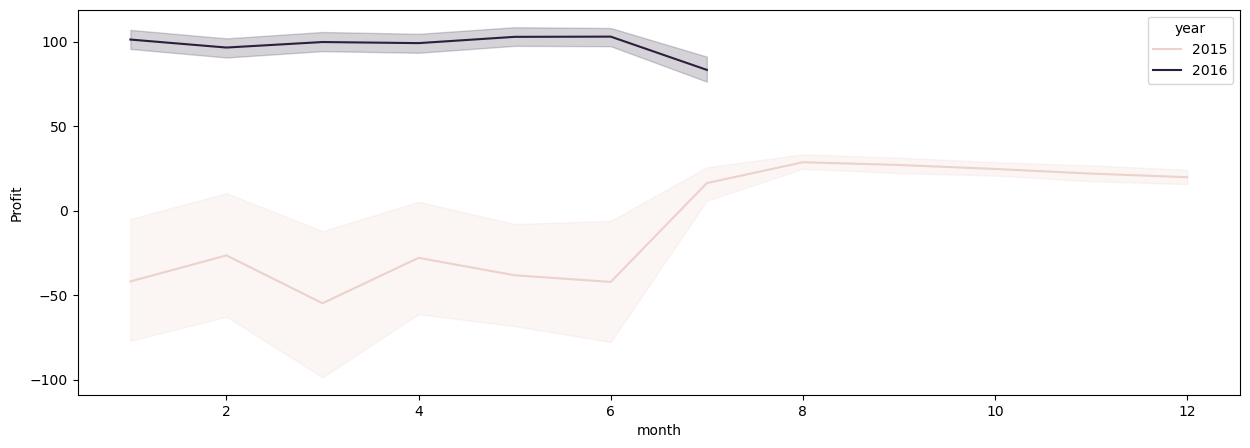

In [89]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='Profit', data=df, hue='year');

In [90]:
# using pivot table
df.pivot_table(values='Profit', index="year", columns = 'month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


In [91]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quater', 'age_group', 'cost', 'revenue', 'Profit', 'profit_label'],
      dtype='object')

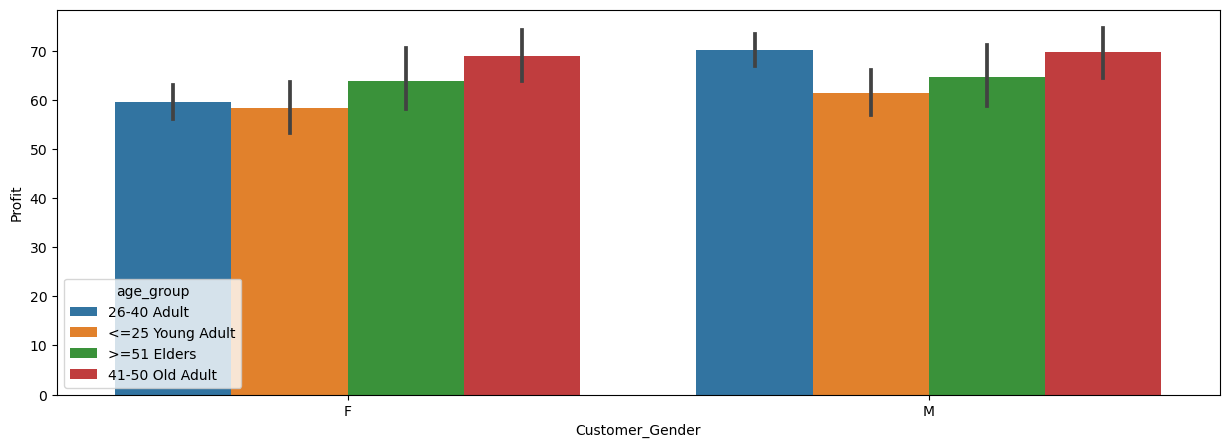

In [92]:
# Customer gender, Age group and profit
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y="Profit", data=df, hue='age_group');

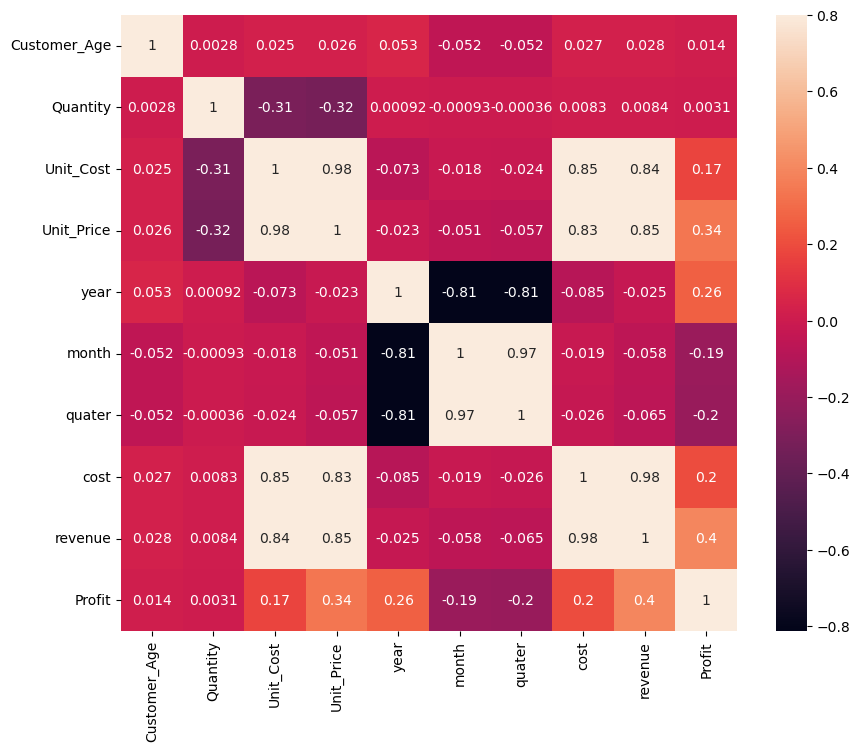

In [93]:
a = df.corr()
f,ax = plt. subplots(figsize=(10,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

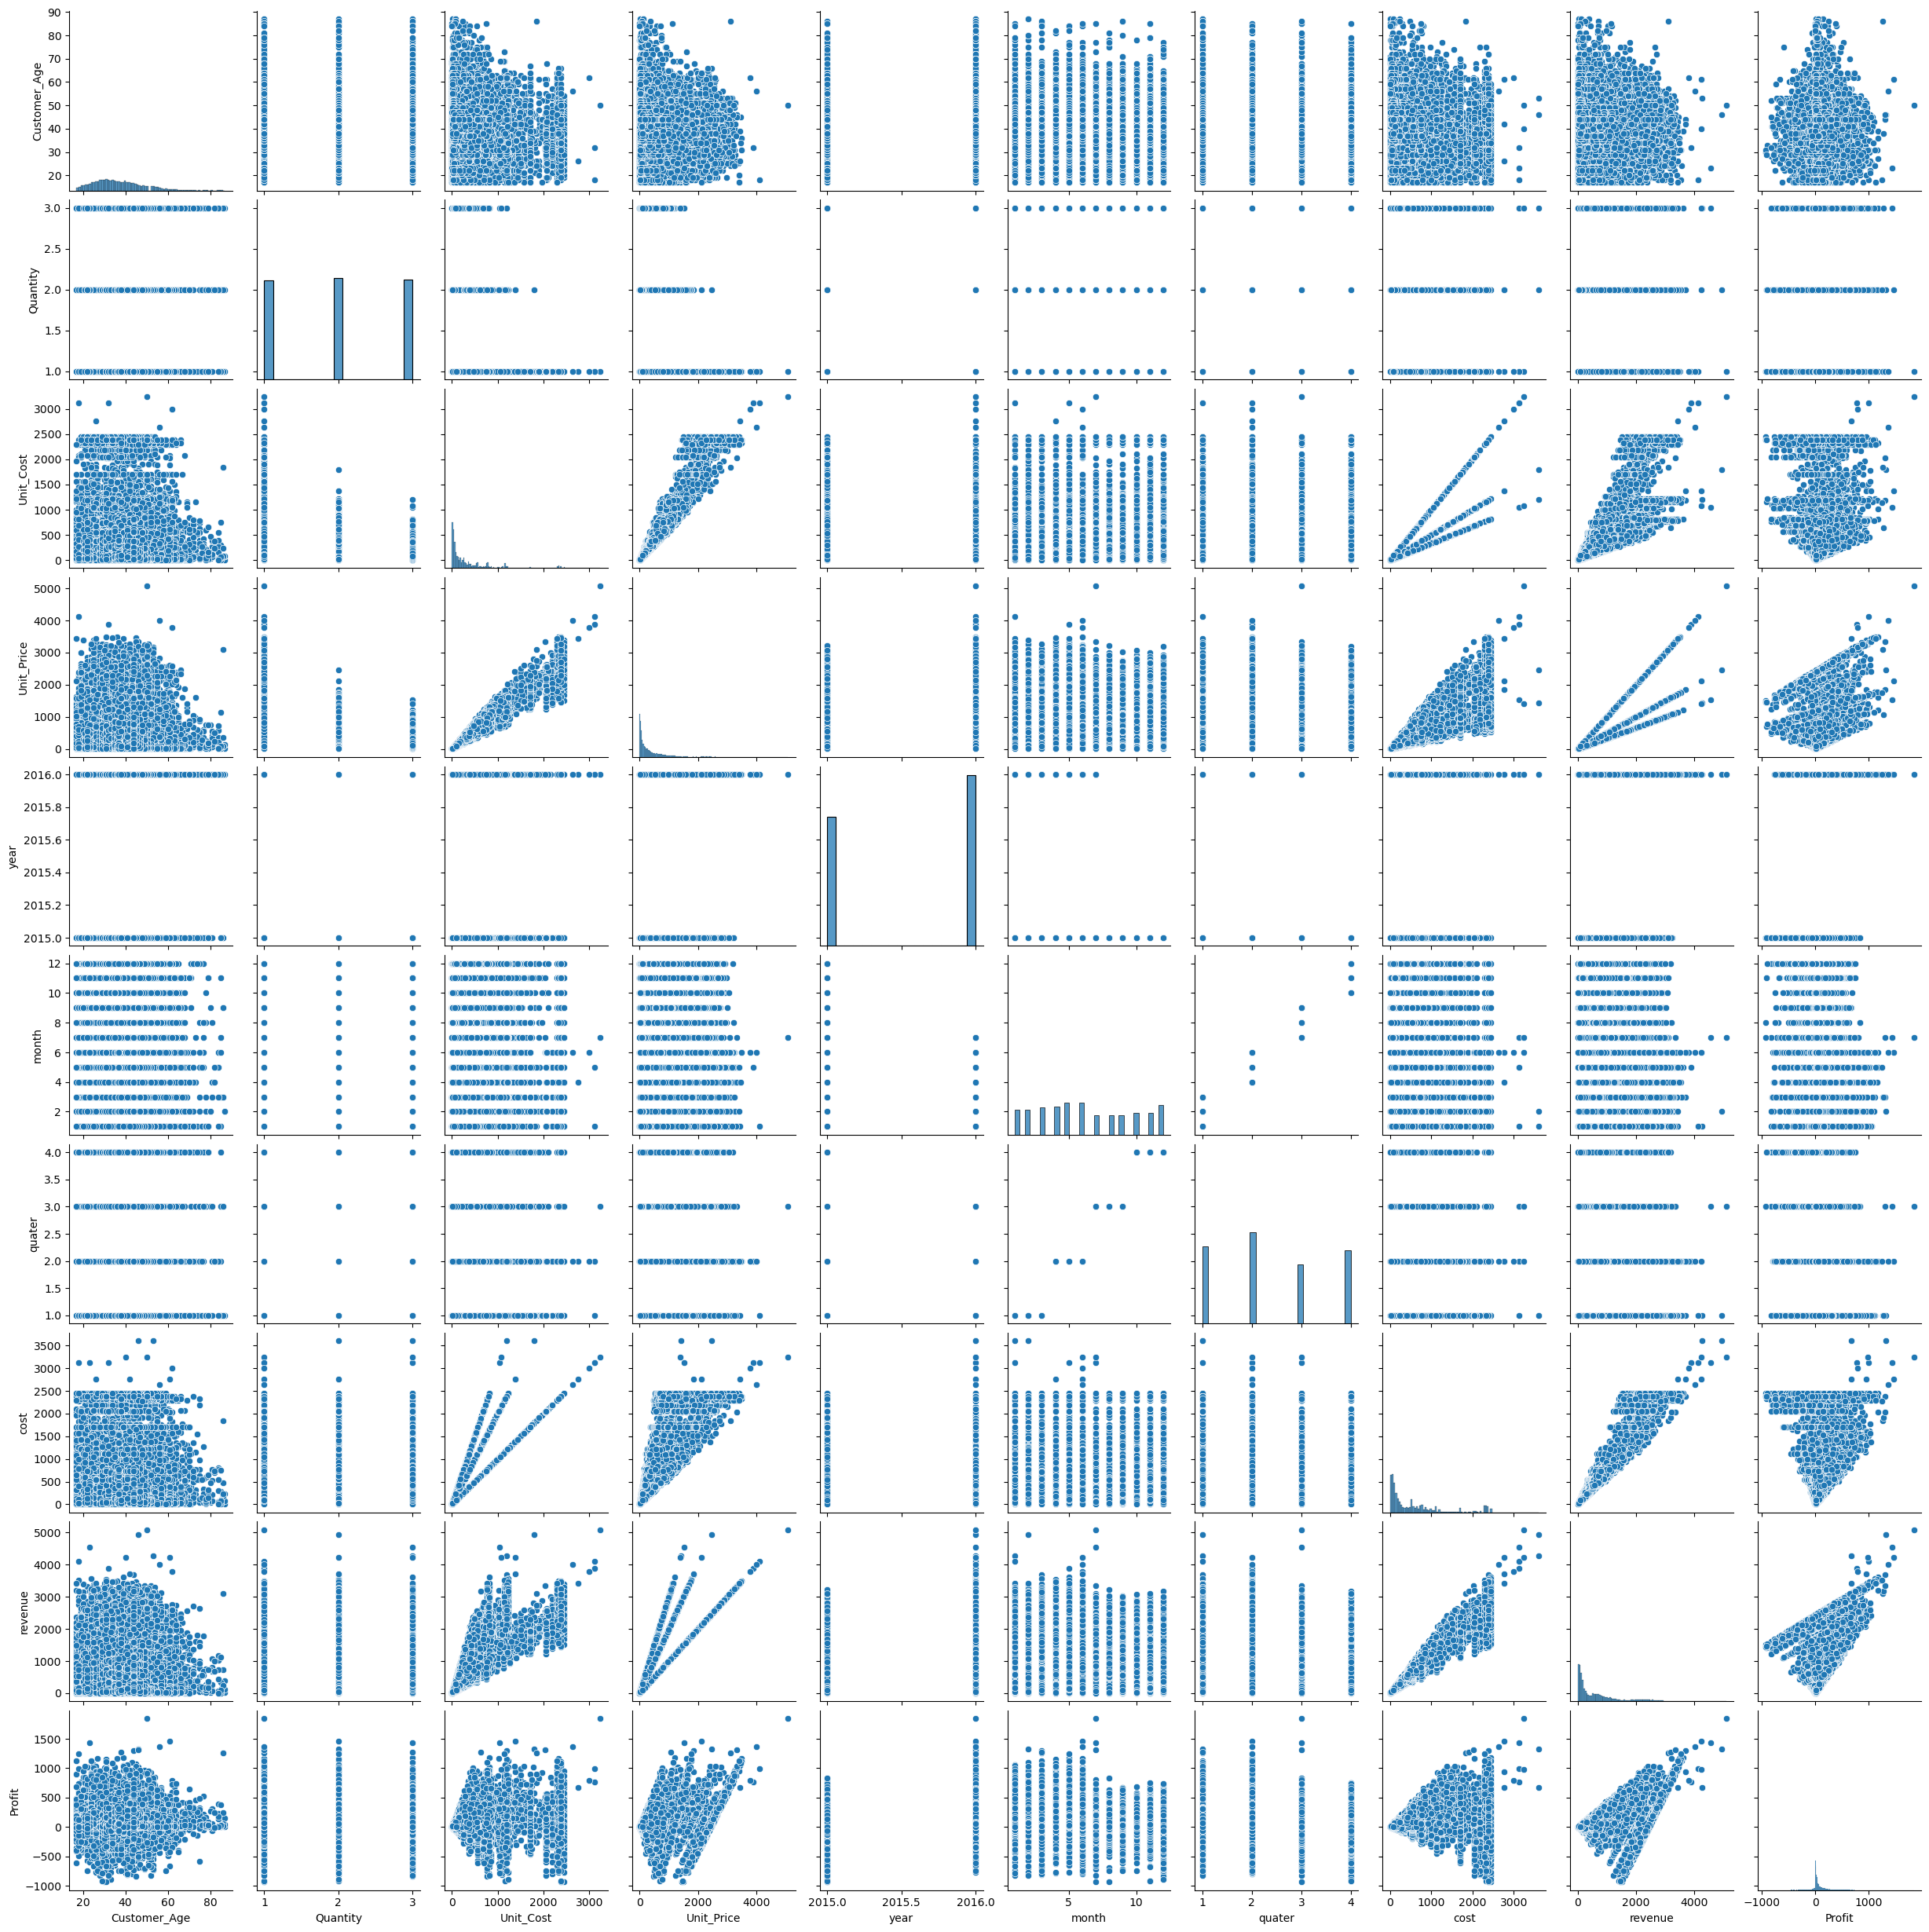

In [94]:
sns.pairplot(df , height=2.5);

Insights:

-The majority of transactions are from low customers.

-Remota has the highest number of transactions, while Kenny has the lowest.

-Lagos has the highest transaction count by state, followed by Abuja.

-The most popular product categories are Accessories, Phones, and Clothing.

-The majority of transactions result in a profit.
 
-Quantity, cost, revenue, and profit have varying ranges and distributions.

RECOMMENDATIONS:

-Focus should be on targeting and retaining low customers, as they contribute significantly to transactions.

-Remota should be recognised for  high sales contribution and consider identifying opportunities for Kenny to improve 
their performance.

-Dune should allocate resources and marketing efforts to regions with high transaction counts, such as Lagos and Abuja.

-Invest in promoting Accessories, Phones, and Clothing, as they are the top-selling product categories.

-Analyze transactions that resulted in losses to understand the reasons and take appropriate actions.

-Monitor and adjust inventory levels based on demand for different product categories.

-Consider introducing special offers or incentives during months with historically lower profits to boost sales.

-Explore more sophisticated statistical analyses to uncover deeper insights, such as regression analysis to understand 
factors affecting profit.

-Continuously monitor customer preferences and adapt strategies accordingly.